Veri de bilinmesi gerekenler;

track_id : şarkı Id

track_name: şarkı adı

acousticness : AKUSTİKLİK

danceability : DANS EDİLEBİLİRLİK	

duration ms	: süre (ms)	

energy	: enerji

instrumentalness key : enstrümantalite anahtarı 

liveness :	canlılık

loudness : ses yüksekliği

mode: modu

speechiness	: konuşkanlık

tempo: tempo

time signature: zaman imzası

valence: değerlik

popularity:Popülerlik



Aşağıdaki hedefler baz alınarak, gerekli analizler yapılmıştır:

-En popüler 5 sanatçı

-En gürültülü 5 parça

-En çok dans edilebilen şarkıya sahip sanatçı

-En iyi 10 enstrümental parça

-70'ten fazla popülariteye sahip parçaların akustikliği..



In [28]:
import numpy as np 
import pandas as pd
from Yardım.EDA import *

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data 

In [29]:
data=pd.read_csv('SpotifyFeatures.csv')

data.sample(10)

artist_name                track_id  \
56945               Modern Andy  61OUSQWoVYXyO5mpzL4hX3   
84934                 Rembrandt  2gpUvjZ840XMhXvy4TFMno   
25595                Matt Costa  1mhgRVzK2krrllOyAbIheD   
106902            Shane & Shane  6SmvLhJep2YLIUSp0mIuhy   
116611                    Jewel  2uMYugZ7YrpPV5IvrdmNVt   
9836                  Real Imaj  6s4YAxxihX9tZNn2GdOqRP   
19793              Eddie Berman  6PU6fjej9JT0pmQHZZjfWP   
110718  Wolfgang Amadeus Mozart  6fIhx5rvbirSKe4eMvoFV6   
102020                      NAV  7kVNc3Mpzc9iOjqnai93E3   
60027          Zhamira Zambrano  37TC165ekS2UqY5iqefUPi   

                                               track_name  acousticness  \
56945                                                Down       0.53900   
84934                                        Newtonstreet       0.08840   
25595                                              Sharon       0.00197   
106902  Tis So Sweet (Hymns Version) [Accompaniment Tr...       0.48400   
116611          Body On Body (Johnny Cash: Forever Words)       0.77600   
9836                                              Tell Me       0.36200   
19793                                              S.O.B.       0.93500   
110718  12 Duos for 2 French Horns, K. 487: No. 4, And...       0.99600   
102020                                           8 To A 4       0.16800   
60027                                        Duro y Suave       0.87400   

        danceability  duration_ms   energy  instrumentalness  key  liveness  \
56945          0.694       224395  0.27300           0.79400    8    0.1310   
84934          0.811       167619  0.83300           0.74400    1    0.2000   
25595          0.545       171560  0.78400           0.00346    5    0.2000   
106902         0.461       427369  0.35700           0.55500    2    0.0566   
116611         0.514       266187  0.43900           0.00342    4    0.0902   
9836           0.860       216059  0.35300           0.00132   10    0.1100   
19793          0.518       204080  0.20000           0.05330    5    0.1160   
110718         0.366        79253  0.00384           0.91500    5    0.0988   
102020         0.805       165556  0.56100           0.00000    1    0.1230   
60027          0.657       169457  0.14500           0.00000   10    0.1170   

        loudness  mode  speechiness    tempo  time_signature  valence  \
56945    -22.862     1       0.0321  109.979               4    0.122   
84934     -3.911     1       0.0526  126.001               4    0.783   
25595     -5.812     1       0.0365  127.050               4    0.821   
106902   -11.545     1       0.0271  102.061               4    0.133   
116611    -9.805     0       0.0276  140.128               4    0.252   
9836      -6.948     1       0.1190  129.982               4    0.200   
19793    -13.185     1       0.0400  101.015               4    0.217   
110718   -31.815     1       0.0465   72.365               3    0.870   
102020    -6.546     1       0.4090  162.047               4    0.569   
60027    -16.007     0       0.3970   94.172               3    0.643   

        popularity  
56945            3  
84934            0  
25595           11  
106902           4  
116611          52  
9836             7  
19793           33  
110718           9  
102020          66  
60027           34

In [30]:
#verinin sutunlarının temel özellikleri ve sutun veri tiplerini görme
DescribeData(data)

                     count           mean            std     min          25%  \
acousticness      130663.0       0.342500       0.345641     0.0       0.0316   
danceability      130663.0       0.581468       0.190077     0.0       0.4590   
duration_ms       130663.0  212633.124098  123155.064847  3203.0  163922.5000   
energy            130663.0       0.569196       0.260312     0.0       0.3960   
instrumentalness  130663.0       0.224018       0.360328     0.0       0.0000   
key               130663.0       5.231894       3.602701     0.0       2.0000   
liveness          130663.0       0.194886       0.167733     0.0       0.0975   
loudness          130663.0      -9.974006       6.544379   -60.0     -11.8980   
mode              130663.0       0.607739       0.488256     0.0       0.0000   
speechiness       130663.0       0.112015       0.124327     0.0       0.0389   
tempo             130663.0     119.473353      30.159636     0.0      96.0140   
time_signature    130663.0  

In [31]:
#NaN değerlerin kontrolü varsa bunların kolonlara oranı
df=controlNaNvalues(data)
df

artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64
-----



Bos_Sutunların_oranı
artist_name                   0.000000
track_id                      0.000000
track_name                    0.000008
acousticness                  0.000000
danceability                  0.000000
duration_ms                   0.000000
energy                        0.000000
instrumentalness              0.000000
key                           0.000000
liveness                      0.000000
loudness                      0.000000
mode                          0.000000
speechiness                   0.000000
tempo                         0.000000
time_signature                0.000000
valence                       0.000000
popularity                    0.000000

In [32]:
#Gereksiz kolonlardan kurtulma: 
data.drop('track_id',axis=1,inplace=True)

data.tail(4)

artist_name      track_name  acousticness  danceability  \
130659           Saint Claire  Enough for You        0.9180         0.387   
130660              Mike Stud           Do It        0.3300         0.717   
130661               D Savage        No Smoke        0.0079         0.772   
130662  Banda Los Sebastianes         En Vida        0.5490         0.715   

        duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
130659       194583   0.249               0.0    9    0.1030   -13.233     1   
130660       139191   0.532               0.0    8    0.0997    -8.351     0   
130661       180013   0.510               0.0    4    0.1310    -9.670     0   
130662       145827   0.734               0.0    3    0.1080    -3.244     1   

        speechiness    tempo  time_signature  valence  popularity  
130659       0.0437   94.039               4   0.3460          60  
130660       0.2060  156.977               4   0.5460          47  
130661       0.1200  120.049               4   0.0755          50  
130662       0.0367  130.128               3   0.9760          55

## EDA 

In [33]:
#En popüler 5 sanatçı demişiz ancak, aşağıdaki dataFrame'de Post Malone'dan iki tane bulunmakta.
data.sort_values(by='popularity',ascending=False)[:5]

artist_name                                     track_name  \
99393     Daddy Yankee                                      Con Calma   
99364      Post Malone                                           Wow.   
99368    Billie Eilish                                        bad guy   
123909     Post Malone  Sunflower - Spider-Man: Into the Spider-Verse   
99366   Jonas Brothers                                         Sucker   

        acousticness  danceability  duration_ms  energy  instrumentalness  \
99393         0.1100         0.737       193227   0.860          0.000002   
99364         0.1630         0.833       149520   0.539          0.000002   
99368         0.3080         0.708       194088   0.418          0.093000   
123909        0.5200         0.744       158040   0.494          0.000000   
99366         0.0427         0.842       181040   0.734          0.000000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
99393     8    0.0574    -2.652     0       0.0593   93.989               4   
99364    11    0.1010    -7.399     0       0.1780   99.947               4   
99368     0    0.1000   -10.998     1       0.3680  131.926               4   
123909    2    0.0716    -5.563     1       0.0699   89.972               4   
99366     1    0.1060    -5.065     0       0.0588  137.958               4   

        valence  popularity  
99393     0.656         100  
99364     0.385          98  
99368     0.578          98  
123909    0.927          98  
99366     0.952          98

['Daddy Yankee', 'Post Malone', 'Billie Eilish', 'Post Malone', 'Jonas Brothers', 'Ariana Grande']


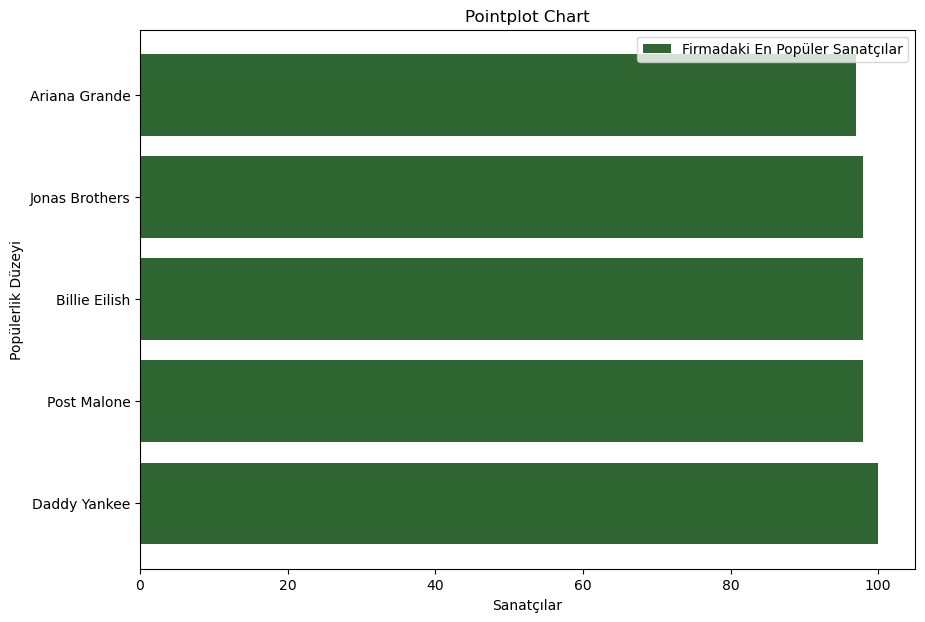

In [34]:
#En popüler 5 sanatçı,
PopularBarPlot(data,6)

In [35]:
data.sort_values(by='loudness',ascending=False)

artist_name               track_name  \
24318                           araabMUZIK                     Bass   
20658   Steve Lieberman, The Gangsta Rabbi        The Diarrhea Song   
23640                           araabMUZIK                 Lalalala   
98408                      Govind Bajaniya    Sajan Mara Dilni Rani   
99459                         Ritu Chauhan  Jija Ji Devghar Ghumadi   
...                                    ...                      ...   
50315                             Old Bike              Khaki Pants   
80442                             Old Bike                    Sober   
60844                             Old Bike                 Delicate   
102933                   Spencer Wymetalek                  Resolve   
55558                             Old Bike               This Is Me   

        acousticness  danceability  duration_ms  energy  instrumentalness  \
24318         0.0449         0.347       182664   0.892          0.925000   
20658         0.0259         0.113       265822   0.846          0.000721   
23640         0.2100         0.354       246935   0.997          0.897000   
98408         0.5940         0.357       344491   0.952          0.000000   
99459         0.1580         0.651       252500   0.998          0.000000   
...              ...           ...          ...     ...               ...   
50315         0.0000         0.000       196520   0.000          0.000000   
80442         0.0000         0.000       171083   0.000          0.000000   
60844         0.0000         0.000       146647   0.000          0.000000   
102933        0.0000         0.000        34923   0.000          0.000000   
55558         0.0000         0.000       116998   0.000          0.000000   

        key  liveness  loudness  mode  speechiness    tempo  time_signature  \
24318     8     0.901     1.806     1       0.1880   81.580               4   
20658     7     0.893     1.750     0       0.0777  151.378               4   
23640    10     0.594     1.187     0       0.0904   98.522               3   
98408     1     0.134     0.935     1       0.0672  103.887               3   
99459     6     0.481     0.905     1       0.2890  155.052               4   
...     ...       ...       ...   ...          ...      ...             ...   
50315     0     0.000   -60.000     0       0.0000    0.000               0   
80442     0     0.000   -60.000     0       0.0000    0.000               0   
60844     0     0.000   -60.000     0       0.0000    0.000               0   
102933    0     0.000   -60.000     0       0.0000    0.000               0   
55558     0     0.000   -60.000     0       0.0000    0.000               0   

        valence  popularity  
24318     0.435          16  
20658     0.061           0  
23640     0.409          15  
98408     0.811           0  
99459     0.605           0  
...         ...         ...  
50315     0.000          24  
80442     0.000          23  
60844     0.000          23  
102933    0.000          56  
55558     0.000          24  

[130663 rows x 16 columns]

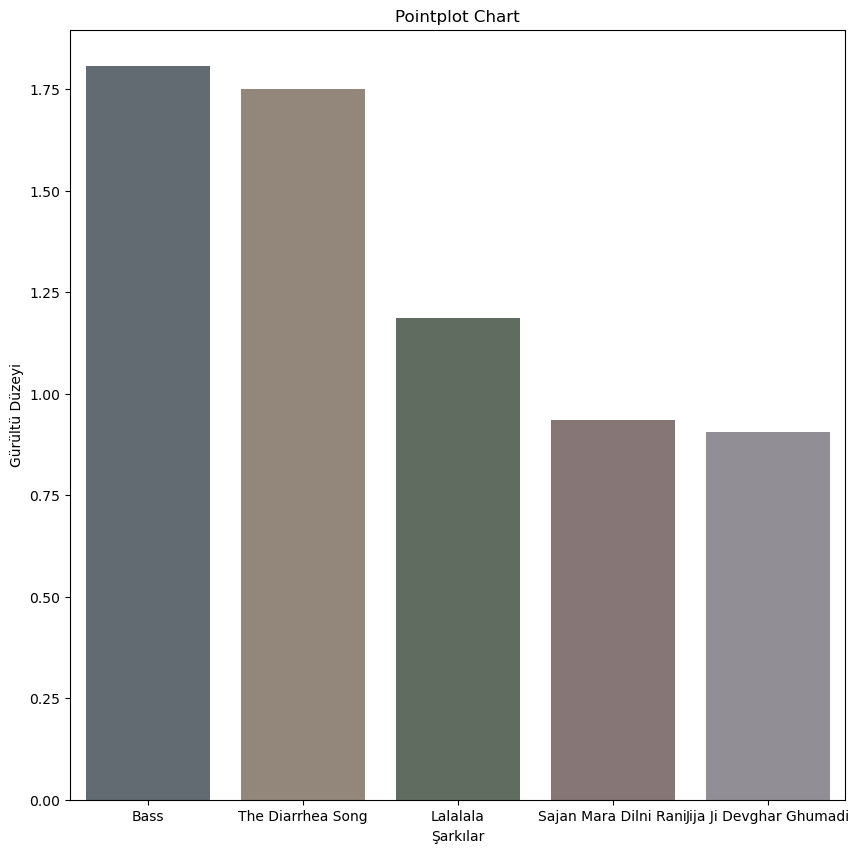

In [36]:
#Şimdi de en gürültülü 5 sanatçıyı bulalım.
LoudnessBarPlot(data,5)

In [37]:
#En çok dans edilebilen şarkıya sahip sanatçı

MostDanceability=data.sort_values(by='danceability',ascending=False)[:1]
MostDanceability


artist_name  track_name  acousticness  danceability  duration_ms  \
35119  Louie Zong  Tappy Toes         0.579         0.996        64005   

       energy  instrumentalness  key  liveness  loudness  mode  speechiness  \
35119   0.285             0.528    4    0.0573   -14.849     1        0.559   

         tempo  time_signature  valence  popularity  
35119  120.031               4    0.909          28

In [38]:
#Eğer sadece ismi lazım ise;
print(data.loc[MostDanceability.index,"artist_name"])

35119    Louie Zong
Name: artist_name, dtype: object


<Figure size 1000x1000 with 0 Axes>

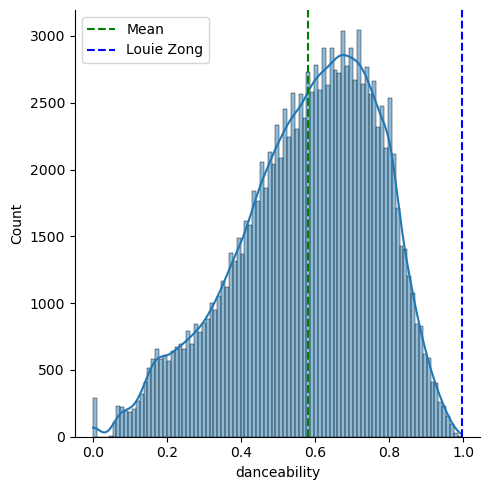

In [39]:
#Peki Louie Zong, Spotify camiasına ne kadar aykırı onu inceleyelim.

plt.figure(figsize=(10,10))

sns.displot(data['danceability'],kde=True)


plt.axvline(x=np.mean(data['danceability']),c='green',ls='--',label='Mean') #ortalama
plt.axvline(x=np.percentile(data['danceability'],100),c='blue',ls='--',label='Louie Zong')#Louie Zong için olacaktır.

plt.legend()
plt.show()

In [40]:
#En iyi 10 enstrümental parça
data.sort_values(by='instrumentalness'
    ,ascending=False)[:3]

artist_name                track_name  acousticness  \
98698  High Altitude Samples          Soft Brown Noise         0.394   
68402            Rain Sounds       Gentle Thunderstorm         0.247   
58349               Granular  Relaxing White Noise One         0.931   

       danceability  duration_ms   energy  instrumentalness  key  liveness  \
98698         0.000       160003  0.00148               1.0    5     0.111   
68402         0.147       130696  0.99900               1.0    7     0.348   
58349         0.000       300000  0.00002               1.0   10     0.111   

       loudness  mode  speechiness    tempo  time_signature  valence  \
98698   -31.839     1       0.0000    0.000               0  0.00000   
68402   -14.395     1       0.0665  136.235               4  0.00001   
58349   -38.077     0       0.0000    0.000               0  0.00000   

       popularity  
98698          70  
68402          28  
58349          40

['Soft Brown Noise', 'Gentle Thunderstorm', 'Relaxing White Noise One', 'Monotone White Noise', 'Brownian Binaural Bliss', 'The Brown Noise', 'Sweeping White Noise', 'Pink Noise for Babies (Free Sleep Noise)', 'REM Sleep and Inner Peace (Theta Waves) - Loopable', 'Noise Blocking Pink']


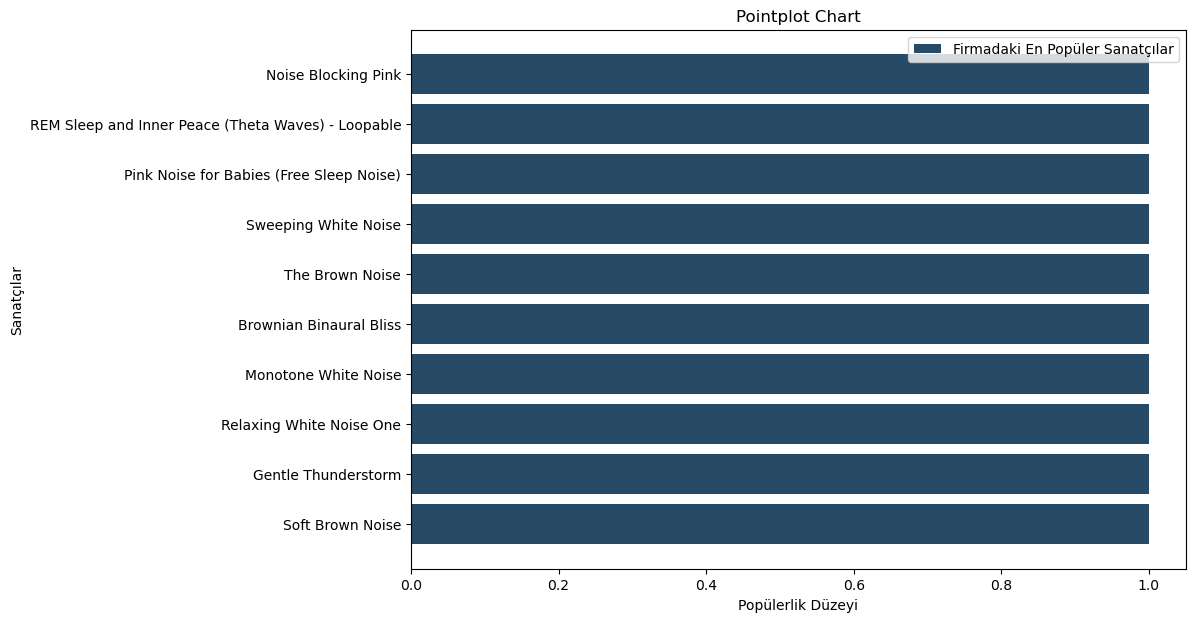

In [41]:
#En iyi 10 enstrümental parça
BarPlot(data,'instrumentalness',10,'#274A66')#data,degiskenAdı,TopN,color kodu şeklinde girilmelidir.


In [42]:
#70'ten fazla popülariteye sahip parçaların akustikliği..
data[data['popularity']>70].sort_values(by='acousticness',ascending=False)

artist_name                              track_name  acousticness  \
125436      Regina Mira                                 October      0.996000   
125400      Max Richter               A Catalogue Of Afternoons      0.996000   
119238         Sigríður                            Welcome Home      0.995000   
98644     Claes Nilsson                             The Sleeper      0.993000   
115452  Steven Goldmund                              Mind-Drift      0.984000   
...                 ...                                     ...           ...   
124324         The 1975  It's Not Living (If It's Not With You)      0.000297   
101792    WALK THE MOON                                Timebomb      0.000276   
123983        21 Savage                                     1.5      0.000244   
98849              M-22                              White Lies      0.000156   
98817         Rammstein                             DEUTSCHLAND      0.000077   

        danceability  duration_ms   energy  instrumentalness  key  liveness  \
125436         0.493       108770  0.01000          0.962000   10    0.1150   
125400         0.124       110880  0.09240          0.848000   11    0.0935   
119238         0.226       252960  0.09340          0.859000    2    0.1170   
98644          0.178       159071  0.00986          0.802000    0    0.1120   
115452         0.144       240000  0.01510          0.982000    8    0.1020   
...              ...          ...      ...               ...  ...       ...   
124324         0.618       248336  0.82400          0.000069    1    0.0649   
101792         0.583       218589  0.77800          0.000000    5    0.6210   
123983         0.885       148656  0.52000          0.000001    1    0.4540   
98849          0.427       176378  0.91600          0.000005    4    0.1540   
98817          0.515       322587  0.90600          0.431000    7    0.0934   

        loudness  mode  speechiness    tempo  time_signature  valence  \
125436   -26.589     1       0.0484   69.470               3   0.3490   
125400   -31.726     1       0.0412  205.999               5   0.1350   
119238   -27.254     0       0.0431  128.904               4   0.2010   
98644    -24.757     1       0.0403   92.709               1   0.0911   
115452   -32.452     1       0.0397  140.096               5   0.0385   
...          ...   ...          ...      ...             ...      ...   
124324    -5.316     1       0.0301  121.238               4   0.5980   
101792    -4.766     1       0.0403  122.053               4   0.4460   
123983    -8.353     1       0.3590   84.022               4   0.3060   
98849     -3.716     0       0.1160  123.539               4   0.6880   
98817     -4.982     1       0.0445  120.132               4   0.1940   

        popularity  
125436          72  
125400          72  
119238          71  
98644           73  
115452          74  
...            ...  
124324          78  
101792          73  
123983          74  
98849           71  
98817           84  

[1758 rows x 16 columns]

Story-Telling kısmı;
Örneğin bir firma şirketi yeni bir star yaratmaya çalışıyor ve bu starı istastiksel temele dayandırarak veri biliminden faydalanmak için bize başvurdu.Yeni bir star yaratmanız gerekiyor,işte verilecek tavsiyeler

In [43]:
def msToMinute(x):
    return  x/ 60000 # çünkü 1 saniye 1000 milisaniye, 1 dakika 60 saniye olduğunda :)

In [44]:
x=data.groupby('popularity').agg({'acousticness': 'mean', 'energy': 'mean','duration_ms':'mean','speechiness':'mean'})

#Popülerliği 90 üzerinde olan, akustikliği ve enerjisine, milisaniyesine, ve konuşkanlığına bakalım.

x=x.iloc[-10:,:]


In [45]:
x['duration_ms']=x['duration_ms'].apply(msToMinute)


x.columns=['acousticness','energy','minute','speechiness']
x
#Ancak bu şekilde müşterimize anlatamayız. Daha çok görselleştirmemiz gerekiyor.

acousticness    energy    minute  speechiness
popularity                                               
90              0.243330  0.643778  3.317389     0.128111
91              0.289554  0.557706  3.358907     0.142529
92              0.357257  0.533000  3.418098     0.127457
93              0.258588  0.576667  3.583511     0.234683
94              0.242900  0.661636  3.543270     0.109545
95              0.215867  0.675333  3.013528     0.165333
96              0.325586  0.569000  3.349976     0.090729
97              0.042100  0.554000  3.174000     0.091700
98              0.258425  0.546250  2.844533     0.168675
100             0.110000  0.860000  3.220450     0.059300

In [46]:
data_copy=data.copy()

data_copy['duration_ms']=data_copy['duration_ms'].apply(msToMinute)
MostPopulardf=data_copy[data_copy['popularity']>90]
MostPopulardf.shape

(60, 16)

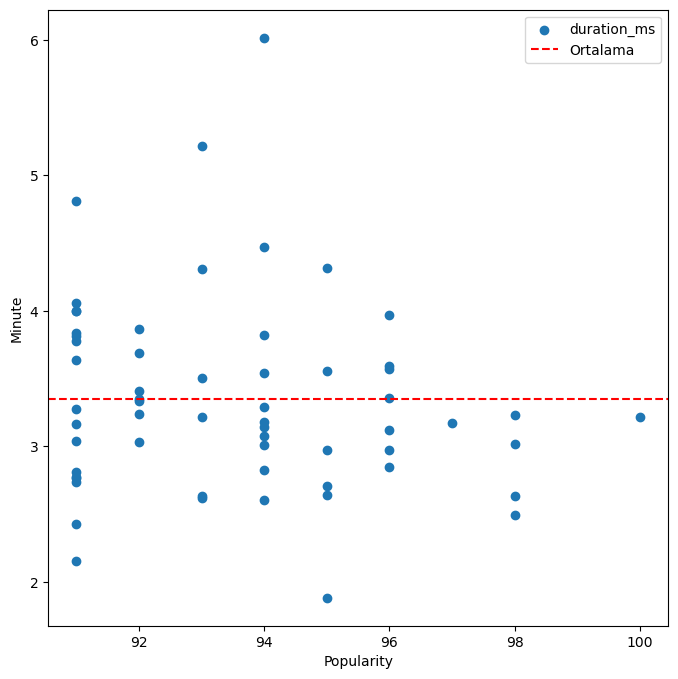

In [47]:
#Şarkının süresi için fikir vermek adına ;
plt.figure(figsize=(8,8))
plt.scatter(data=MostPopulardf, x='popularity', y='duration_ms')
plt.axhline(y=np.mean(MostPopulardf['duration_ms']),c='red',ls='--',label='Ortalama')
plt.xlabel('Popularity')
plt.ylabel('Minute')
plt.legend()
plt.show()

#Popülerlik kazanmak istiyorsanız şarkılarınız 3 ve 4 dakika arasında olmasına dikkat edin uyarısı verebiliriz.

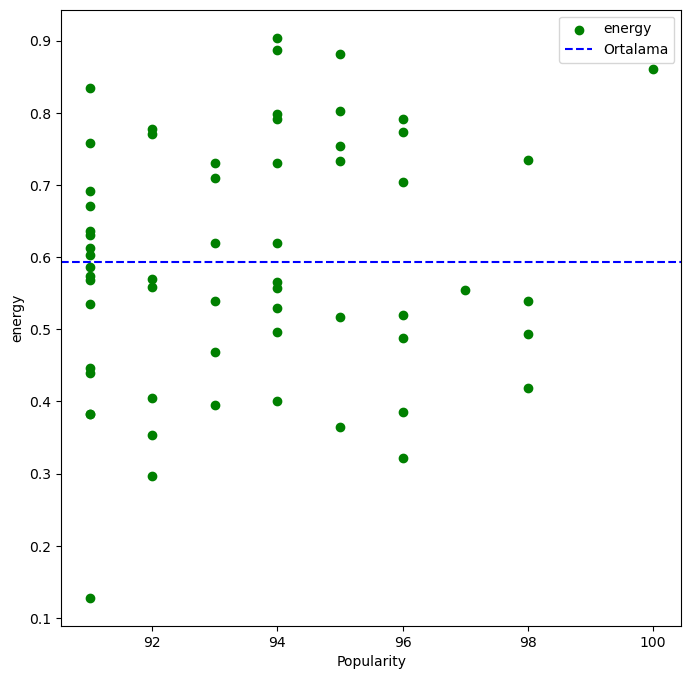

In [48]:
#Şarkı enerjisi için ; 0.6'dan bir tık uzak bir yakın şarkılar yapabilirsiniz. Sektör'de düşük enerjili pek tutmuyor diyebiliriz.

plt.figure(figsize=(8,8))
plt.scatter(data=MostPopulardf, x='popularity', y='energy',color='green')
plt.axhline(y=np.mean(MostPopulardf['energy']),c='blue',ls='--',label='Ortalama')
plt.xlabel('Popularity')
plt.ylabel('energy')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


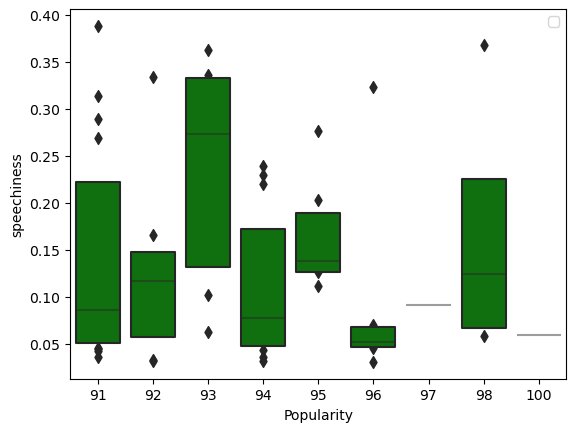

In [49]:
# speechiness ; peki şarkı sözleri çok olmalı mı ? 
sns.boxenplot(data=MostPopulardf,x=MostPopulardf["popularity"], y=MostPopulardf["speechiness"],color="g") 
plt.xlabel('Popularity')
plt.ylabel('speechiness')
plt.legend()
plt.show()

#Burada yukarıdakiler kadar net tavsiyeler yok.

<Axes: xlabel='popularity', ylabel='acousticness'>

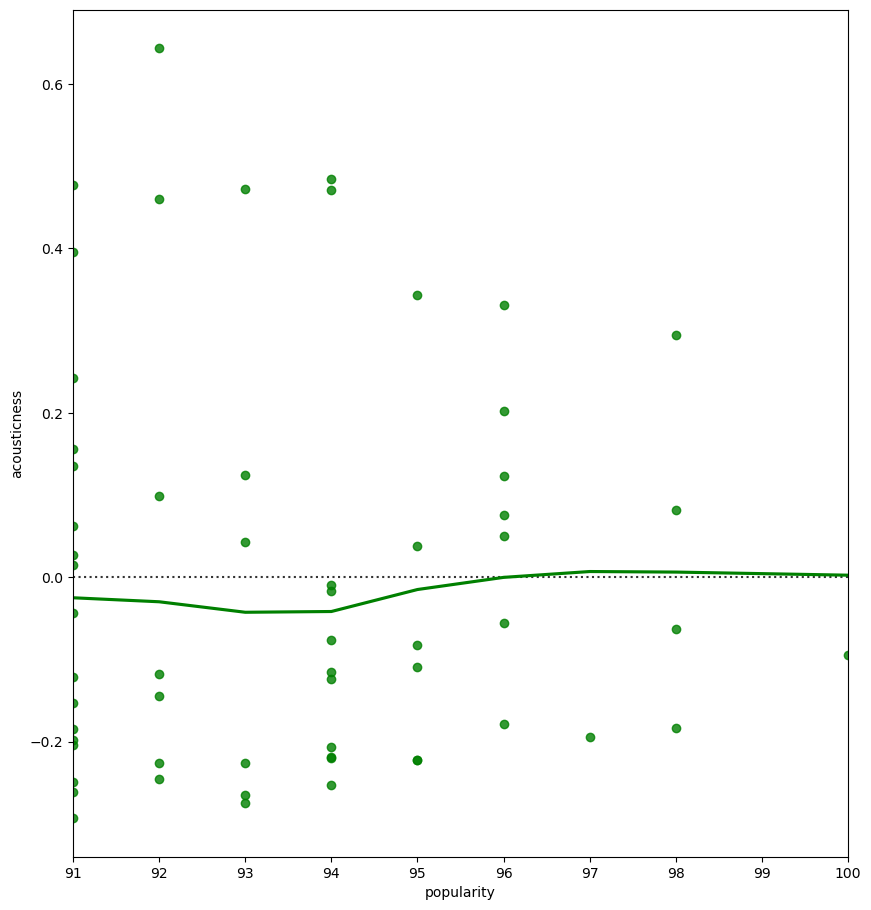

In [50]:
#Siz o kadar da uğraşmadan, seaborn ile yapabilirsiniz. 


plt.figure(figsize=(10,11))
sns.residplot(data=MostPopulardf,x="popularity", y="acousticness", lowess=True, color="g")

#Çoğunlukla az akustikli bir şarkı yapmanız tavsiye edilir.

<Axes: xlabel='popularity', ylabel='loudness'>

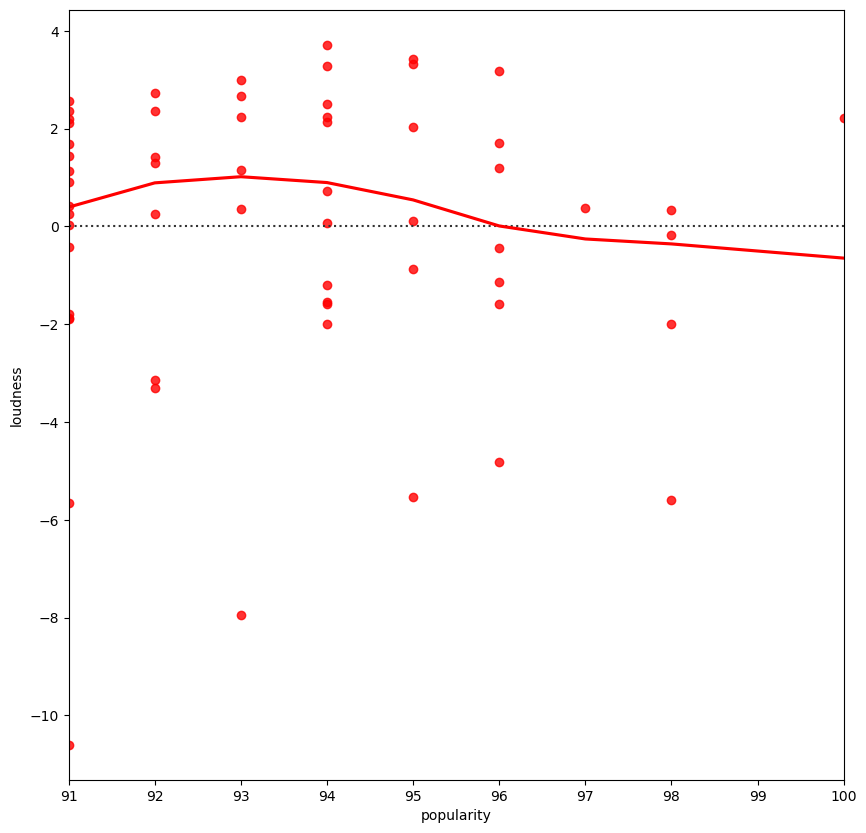

In [51]:
#Şarkının ses yüksekliğine bakalım.

plt.figure(figsize=(10,10))
sns.residplot(data=MostPopulardf,x="popularity", y="loudness", lowess=True, color="r")

#Siz en iyisi ses yüksekliği yüksek olan şarkılar yapın önerisi yapılabilir.

### Statistical concept

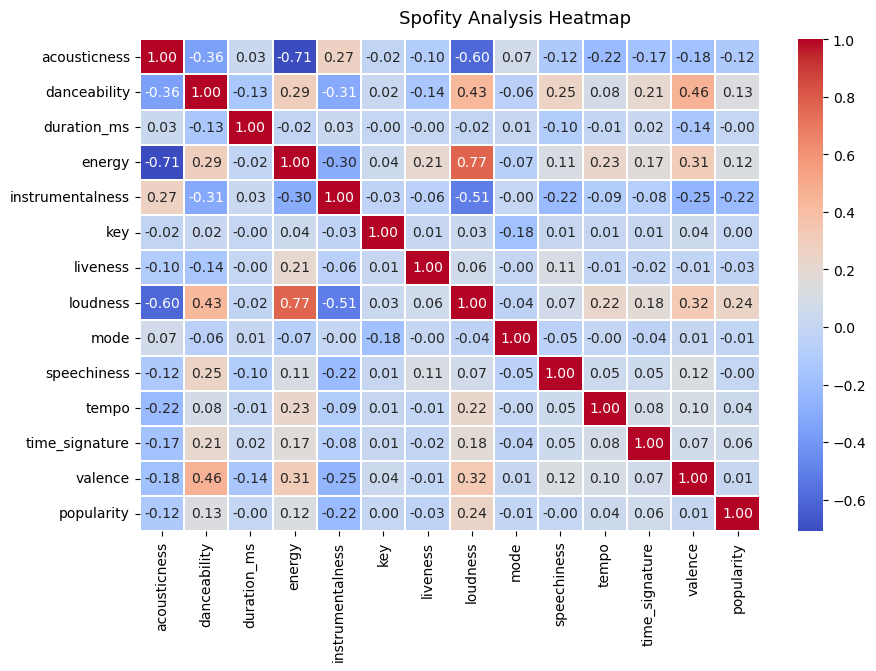

In [52]:
#90 'üzerinde olanlar için bir korelasyon grafiği çizilmiştir.

data = data.drop(["artist_name","track_name"], axis=1)


f, ax= plt.subplots(figsize=(10,6))
corr=data.corr()
heatmap=sns.heatmap(round(corr,2),annot=True,ax=ax,cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t=f.suptitle("Spofity Analysis Heatmap",fontsize=13)

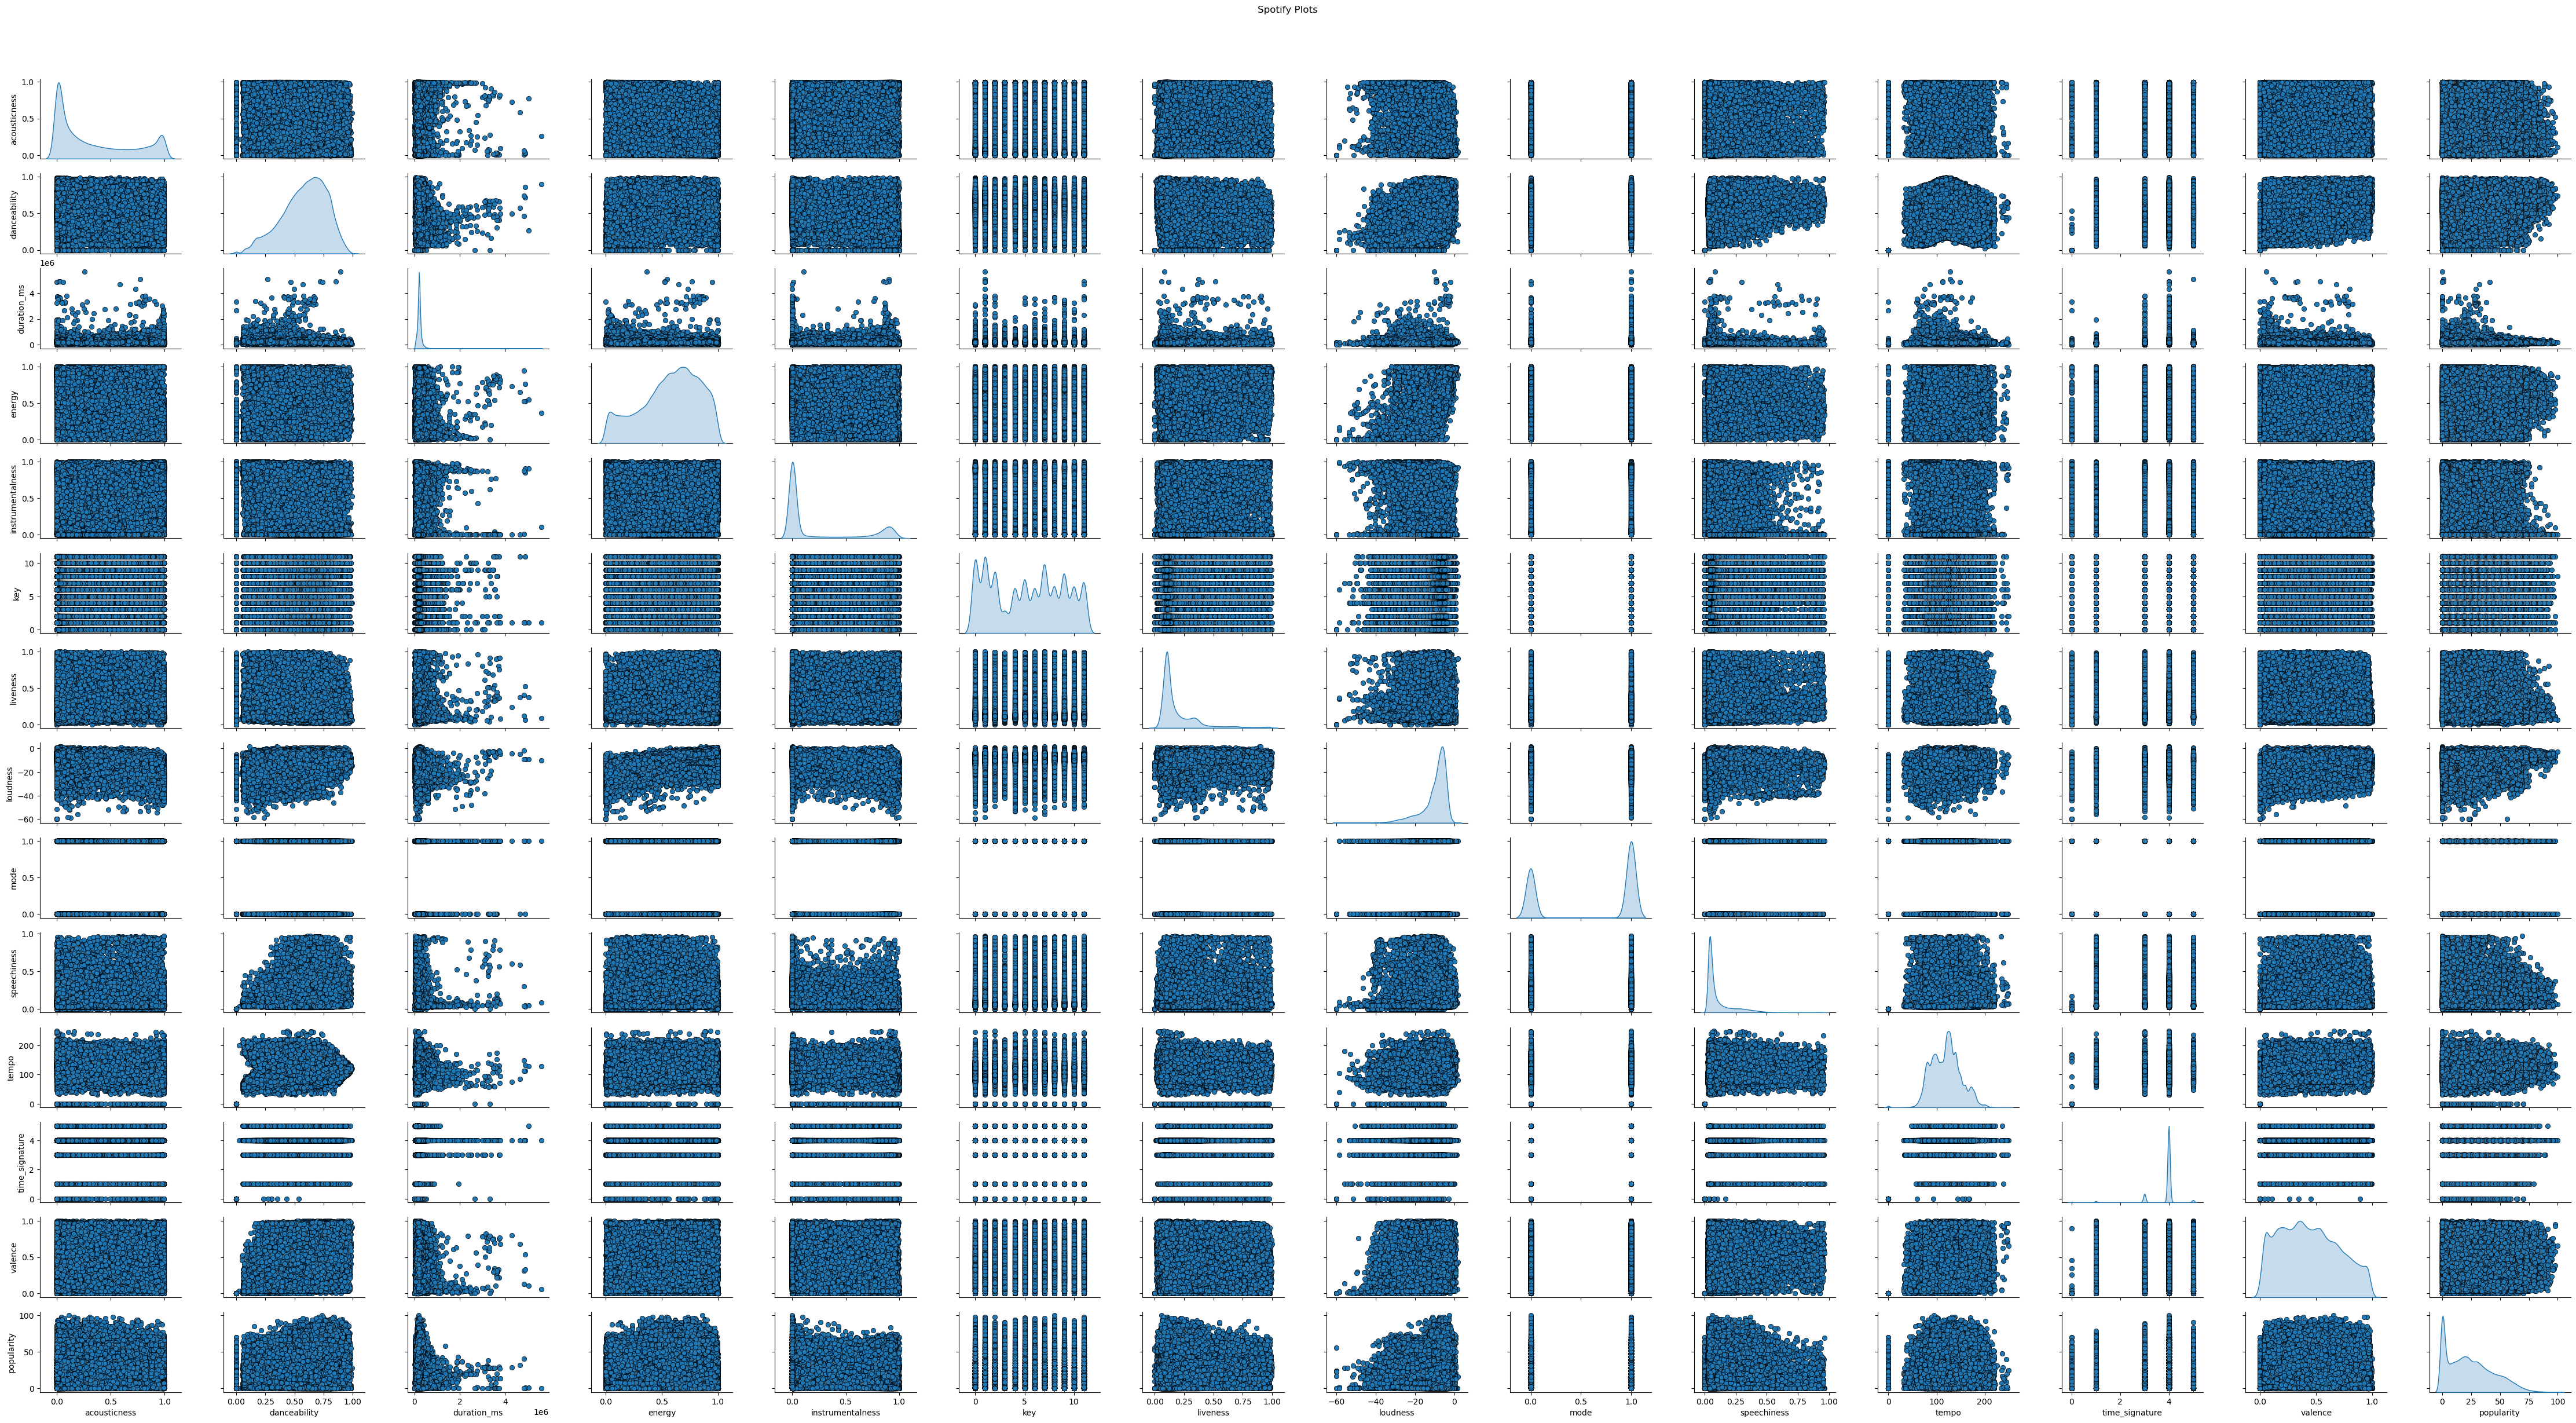

In [53]:
pp=sns.pairplot(data,height=1.8,aspect=1.8,
                plot_kws=dict(edgecolor='k',linewidth=0.5),
                diag_kind="kde",diag_kws=dict(shade=True))
fig=pp.fig
fig.subplots_adjust(top=.93,wspace=0.3)
t=fig.suptitle("Spotify Plots",fontsize=12)

In [57]:
def clmap_transformation(data, feature, bounds=tuple(), verbose=True):
    """
    Applies a continuous-to-categorical mapping (CLMAP) transformation to a given feature.

    Args:
        data (pd.DataFrame): The DataFrame containing the feature.
        feature (str): The name of the feature to transform.
        bounds (tuple): A tuple of two floats, representing the lower and upper bounds of the transformation.
        verbose (bool): Whether to print the lower and upper bounds of the transformation.

    Returns:
        pd.DataFrame: The DataFrame with the transformed feature.
    """

    if bounds:
        lower_bound, upper_bound = bounds
    else:
        dqr_dict = feature_wise_dqr(data[feature], feature, "continious")
        interquartile_range = dqr_dict["3rd_q"] - dqr_dict["1st_q"]

        lower_bound = dqr_dict["1st_q"] - 1.5 * interquartile_range
        upper_bound = dqr_dict["3rd_q"] + 1.5 * interquartile_range

    if verbose:
        print(f"Lower bound set to {lower_bound}, Upper bound {upper_bound}")

    def transform_(value):
        if value < lower_bound:
            return lower_bound
        elif value > upper_bound:
            return upper_bound
        else:
            return value

    data[feature] = data[feature].apply(transform_)

    return data


def feature_wise_dqr(data, feature, type="continious"):
    """
    Calculates the interquartile range (IQR) for a given feature.

    Args:
        data (pd.DataFrame): The DataFrame containing the feature.
        feature (str): The name of the feature to calculate the IQR for.
        type (str): The type of feature. Can be either "continious" or "categorical".

    Returns:
        dict: A dictionary containing the IQR, first quartile, and third quartile for the feature.
    """

    if type == "continious":
        q1 = data[feature].quantile(0.25)
        q3 = data[feature].quantile(0.75)
        iqr = q3 - q1
        return {"iqr": iqr, "1st_q": q1, "3rd_q": q3}
    elif type == "categorical":
        mode = data[feature].mode()[0]
        return {"mode": mode}
    else:
        raise ValueError("Invalid type. Type must be either 'continious' or 'categorical'.")



In [58]:
feature="danceability"

clmap_transformation(data,feature,bounds=tuple(),verbose=True)

KeyError: 'danceability'

In [ ]:
 #Done!